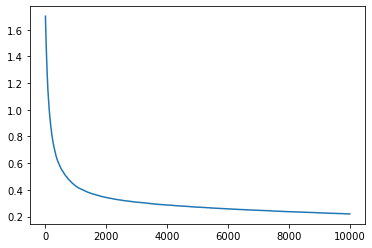

In [26]:
import numpy as np
import matplotlib.pyplot as plt

N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2 * np.random.randint(2, size=N) - 1
theta = np.random.randn(p)
alpha = 0.001

losses = []
for _ in range(10000):
    for i in range(30):
        idx = np.random.randint(30)
        loss = 1 / N * np.sum(np.log(1 + np.exp(-Y * X.dot(theta))))
        grad = (-Y[idx] * X[idx]) / (1 + np.exp(Y[idx] * X[idx].dot(theta)))
        theta = theta - alpha * grad
    losses.append(loss)
    
plt.plot(losses)

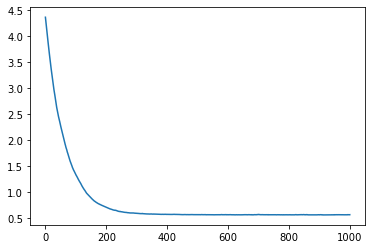

In [27]:
import numpy as np
import matplotlib.pyplot as plt

N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2 * np.random.randint(2, size=N) - 1
theta = np.random.randn(p)
alpha = 0.001
lamda = 0.1

losses = []
for _ in range(1000):
    for i in range(30):
        idx = np.random.randint(30)
        loss = 1 / N * np.sum(np.maximum(0, 1- Y * X.dot(theta))) + lamda * theta.dot(theta)
        grad = np.heaviside(1 - Y[idx] * X[idx].dot(theta), 0.5) * (- Y[idx] * X[idx]) + 2 * lamda * theta
        if 1 - Y[idx] * X[idx].dot(theta) == 0:
            print("AAAAAAAHHHHH NOOOOOO....")
        theta = theta - alpha * grad
    losses.append(loss)

plt.plot(losses)

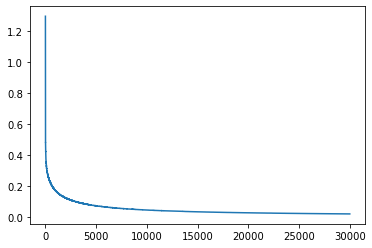

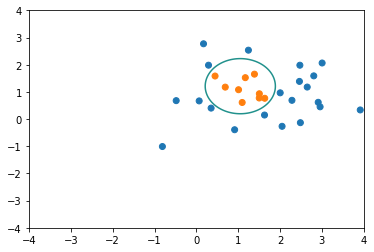

In [30]:
import numpy as np
import matplotlib.pyplot as plt

N = 30
np.random.seed(0)
X = np.random.randn(2,N)
y = np.sign(X[0,:]**2+X[1,:]**2-0.7)
theta = 0.5
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1],[1]])

y_colored = np.where(y>0, '#1f77b4', '#ff7f0e')
plt.figure(0)
plt.scatter(X[0,:], X[1,:], c=y_colored)

u = X[0,:]
v = X[1,:]
phiX = [np.ones(N), u, u**2, v, v**2]
phiX = np.array(phiX)
phiX = phiX.T # X changed to phiX, shape (N, p)->(N, 5)

a = 0.001
np.random.seed(i)
w = np.random.randn(5) # theta changed name to w, shape p->5
losses = []
for _ in range(30000):
    for i in range(30):
        idx = np.random.randint(30)
        loss = 1 / N * np.sum(np.log(1 + np.exp(-y * phiX.dot(w))))
        grad = (-y[idx] * phiX[idx]) / (1 + np.exp(y[idx] * phiX[idx].dot(w)))
        w = w - alpha * grad
    losses.append(loss)
plt.figure(1)   
plt.plot(losses)

xx = np.linspace(-4, 4, 1024)
yy = np.linspace(-4, 4, 1024)
xx, yy = np.meshgrid(xx, yy)
# 0 == w[0]+w[1]*x+w[2]*(x**2)+w[3]*y+w[4]*(y**2)
Z = w[0] + (w[1] * xx + w[2] * xx**2) + (w[3] * yy + w[4] * yy**2)
plt.figure(0)
plt.contour(xx, yy, Z, 0)

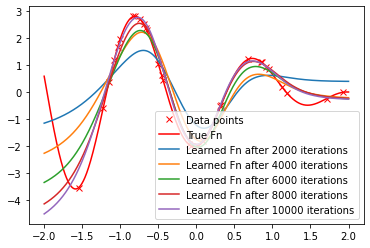

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))


X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

def f_th(theta, x) :
    return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

def diff_f_th(theta, x) :
    a = theta[0:p]
    b = theta[p:2*p]
    u = theta[2*p:3*p]
    grad_a = np.multiply(sigmoid_prime(a*x+b), u) * x
    grad_b = np.multiply(sigmoid_prime(a*x+b), u)
    grad_u = sigmoid(a*x+b)
    return np.concatenate((grad_a, grad_b, grad_u))

xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    loss = 1/N * np.sum(1/2*(f_th(theta, X)-Y)**2)
    i = np.random.randint(N)
    grad = (f_th(theta, X[i])-Y[i])*diff_f_th(theta, X[i])
    theta = theta - alpha * grad
    if (k+1)%2000 == 0 :
        plt.plot(xx,f_th(theta, xx),label=f'Learned Fn after {k+1} iterations')

plt.legend()
# plt.show()
plt.savefig('plot.png')
